In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [2]:
def stable_count_sort(arr, B, k, digits_arr):
    C = [0]*(k+1)
    
    for j in range(len(arr)):
        C[digits_arr[j]] = C[digits_arr[j]] + 1
    for i in range(1,k+1):
        C[i] = C[i] + C[i-1]
    for j in range(len(arr)-1,-1,-1):
        B[C[digits_arr[j]]-1] = arr[j]
        C[digits_arr[j]] = C[digits_arr[j]] - 1
    return B

def rad_sort(arr):
    start_time = time.time()
    d = len(str(arr[0]))
    for i in range(0,d):
        digits_arr = []
        for j in range(len(arr)):
            digits_arr.append((arr[j]//10**i) % 10)
        arr = stable_count_sort(arr, [0]*len(arr), max(digits_arr), digits_arr)
    end_time = time.time()
    time_taken = end_time - start_time
    print(time_taken)
    return arr


In [3]:
print("rad_sort result", rad_sort([21,23,54,67,89,12,34,85,45,95]))

4.649162292480469e-05
rad_sort result [12, 21, 23, 34, 45, 54, 67, 85, 89, 95]


In [4]:
#Quick Sort

def partition(A,p,r):
  x = A[r]
  i = p-1
  
  for j in range(p,r):
    if (A[j]<=x):
      i=i+1
      A[i], A[j] = A[j], A[i]
  A[i+1], A[r] = A[r], A[i+1]
  return i+1

def quicksort(A,p,r):
  if (p<r):
    q = partition(A,p,r)
    quicksort(A,p,q-1)
    quicksort(A,q+1,r)

8.869171142578125e-05
0.0001068115234375
0.00013327598571777344
0.0002009868621826172
0.0001938343048095703
0.00021338462829589844


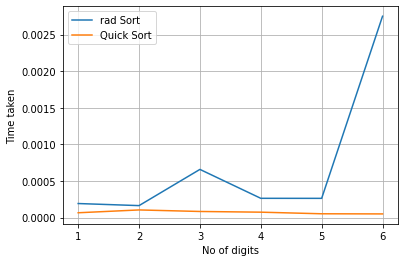

In [5]:
digit_size = []
rad_sort_time = []
q_sort_time = []
rad_sort_time_list = []
q_sort_time_list = []


for i in range(0,6):
    np.random.seed(0)
    n=20
    arr = np.random.randint(10**i, (10**(i+1)) , n)
    digit_size.append(i+1)
    
    #rad sort
    rad_start_time = time.time()
    rad_sorted_arr = rad_sort(arr)
    rad_sort_time = time.time() - rad_start_time

    #Quick sort
    q_start_time = time.time()
    q_sorted_arr = quicksort(arr, 0, len(arr)-1)
    q_sort_time = time.time() - q_start_time
        
    rad_sort_time_list.append(rad_sort_time)
    q_sort_time_list.append(q_sort_time)

plt.xlabel('No of digits')
plt.ylabel('Time taken')
plt.plot(digit_size, rad_sort_time_list, label = "rad Sort")
plt.plot(digit_size, q_sort_time_list, label = "Quick Sort")
plt.grid()
plt.legend()
plt.show()

The input array is: [0.79, 0.13, 0.16, 0.64, 0.39, 0.2, 0.89, 0.53, 0.71, 0.42]
after the BucketSort operation the array is: [0.13, 0.16, 0.2, 0.39, 0.42, 0.53, 0.64, 0.71, 0.79, 0.89]


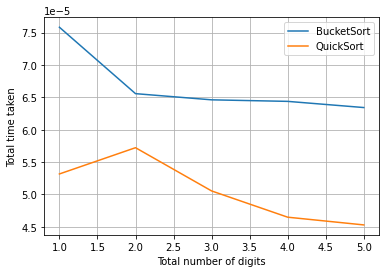

In [6]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

# Insertion Sort

def insort(A) :
    for j in range(1, len(A)) :
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key :
            A[i+1] = A[i]
            i = i-1
        A[i+1] = key
    return A

# Bucket Sort 

def bucketSort(A) :
    sorted_array = []
    n = len(A)
    new_array_b = [[0]]*(n)
    for i in range(n) :
        new_array_b[i] = []
    for i in range(n) :
        new_array_b[math.floor(n*A[i]/10**len(str(A[i])))].append(A[i])
    for i in range(n) :
        sorted_bi = insort(new_array_b[i])
        sorted_array = sorted_array + sorted_bi
    return sorted_array


A = [0.79,0.13,0.16,0.64,0.39,0.20,0.89,0.53,0.71,0.42]

print('The input array is:',A)
print('after the BucketSort operation the array is:',bucketSort(A))

#QuickSort

def quickSort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quickSort(A, p, q-1)
        quickSort(A, q+1, r)

def partition(A, p, r):
    x = A[r]
    i = p-1
    for j in range(p, r):
        if A[j] <= x:
            i = i + 1
            A[i],A[j] = A[j],A[i]

    A[i+1],A[r] = A[r],A[i+1]
    return i+1

digit_size = []
bucket_sort_time = []
q_sort_time = []
q_sort_time_list = []
bucket_sort_time_list = []

for i in range(0,5):
    np.random.seed(0)
    n=20
    A = np.random.randint(10**i, (10**(i+1)) , n)
    digit_size.append(i+1)

    #Bucket sort
    bucket_start_time = time.time()
    bucket_sorted_arr = bucketSort(A)
    bucket_sort_time = time.time() - bucket_start_time

    #Quick sort
    q_start_time = time.time()
    q_sorted_array = quickSort(A, 0, len(A)-1)
    q_sort_time = time.time() - q_start_time
        
    bucket_sort_time_list.append(bucket_sort_time)
    q_sort_time_list.append(q_sort_time)
    
plt.xlabel('Total no of digits')
plt.ylabel('Total time taken')
plt.plot(digit_size, bucket_sort_time_list, label ='BucketSort')
plt.plot(digit_size, q_sort_time_list, label = "QuickSort")
plt.grid()
plt.legend()
plt.show()
